# CHIRPS - Precipitation Data
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@date**: 2022-07-25
 - **Url**: https://www.chc.ucsb.edu/data/chirps


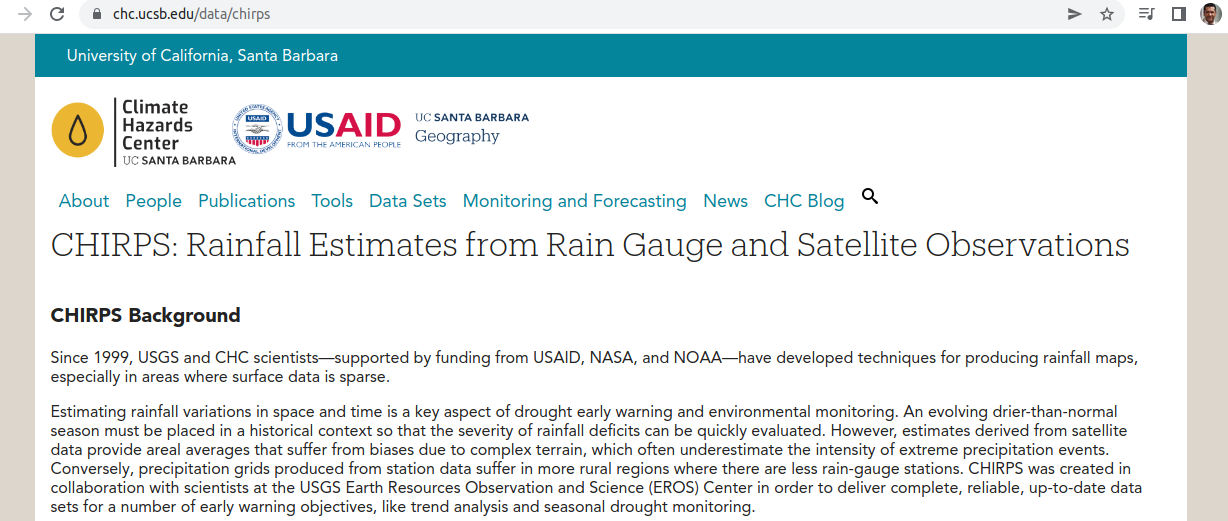

## Request Data



- Url: https://data.chc.ucsb.edu/products/CHIRPS-2.0/
- goto:  https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/ 
- Filters for 25:
  - goto: https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p25/ 
  - Select File example  https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p25/chirps-v2.0.2000.days_p25.nc and  **Download**

- Filters for 05:
  - or goto https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/

## Libraries

In [1]:
# https://pypi.org/project/wget/
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4b98e07b8ead782dc1345030e9d09b2f69537eca98385c3b819d1731b9dbebc3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 10.2 MB/s 
     |████████████████████████████████| 6.3 MB 40.8 MB/s 
     |████████████████████████████████| 16.7 MB 502 kB/s 


In [3]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import wget
import os 
import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [4]:
def get_lat_lon(df,lat='lat',lon='lon'):
  char_sep = '#'
  df_ = df.reset_index()[[lat,lon]] #  
  df_['idx'] = df_[lat].astype(str) + char_sep + df_[lon].astype(str)
  df_ = [x.split(char_sep) for x in df_['idx'].unique()]
  df_ = np.array(df_, dtype=np.float64)
  return pd.DataFrame(df_, columns=['lat','lon'])



## Download Data

Check in your email and copy the download link

In [5]:
# Download data
shutil.rmtree('./data', ignore_errors=True)
os.mkdir('./data')

# url="https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p25/chirps-v2.0.2000.days_p25.nc" # <--- paste it, here
url="https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.2000.days_p05.nc"
filename = wget.download(url, out="./data/")

In [6]:
filename

'./data//chirps-v2.0.2000.days_p05.nc'

In [ ]:
# # unzip data
# with zipfile.ZipFile(filename, 'r') as zip_ref:
#     zip_ref.extractall('data')

## Show Data

In [7]:
# we're going to use a netCDF file from ./data folder
path = r'./data/*.nc'
files = glob.glob(path)
file=files[0]
print('\n\nFile:', file,'\n\n')

# tips performance
ds_xr = xr.open_dataset(file,chunks={'latitude': 100, 'longitude': 100,'time': '1GB'})




File: ./data/chirps-v2.0.2000.days_p05.nc 




In [8]:
ds_xr

,Array,Chunk
Bytes,21.08 GB,14.64 MB
Shape,"(366, 2000, 7200)","(366, 100, 100)"
Count,1441 Tasks,1440 Chunks
Type,float32,numpy.ndarray


In [9]:
ds_xr.precip.data

,Array,Chunk
Bytes,21.08 GB,14.64 MB
Shape,"(366, 2000, 7200)","(366, 100, 100)"
Count,1441 Tasks,1440 Chunks
Type,float32,numpy.ndarray


In [10]:
ds_xr_query = ds_xr.sel(time='2000-01-01')
ds_xr_query = ds_xr_query.where(ds_xr_query.latitude < -30, drop=True)
ds_xr_query = ds_xr_query.where(ds_xr_query.latitude > -35, drop=True)

ds_xr_query = ds_xr_query.where(ds_xr_query.longitude < -53, drop=True)
ds_xr_query = ds_xr_query.where(ds_xr_query.longitude > -59, drop=True)

In [11]:
# %%time
ds_xr_query_done = ds_xr_query.compute()

In [12]:
ds_xr_query_done

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 120)
Coordinates:
  * latitude   (latitude) float32 -34.97 -34.92 -34.88 ... -30.12 -30.07 -30.02
  * longitude  (longitude) float32 -58.98 -58.93 -58.88 ... -53.13 -53.08 -53.03
    time       datetime64[ns] 2000-01-01
Data variables:
    precip     (latitude, longitude) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [13]:
df_satellite = ds_xr_query_done.to_dataframe()
df_satellite

precip       time
latitude   longitude                    
-34.974998 -58.975006     0.0 2000-01-01
           -58.925003     0.0 2000-01-01
           -58.875008     0.0 2000-01-01
           -58.825005     0.0 2000-01-01
           -58.775002     0.0 2000-01-01
...                       ...        ...
-30.025000 -53.225006     0.0 2000-01-01
           -53.175003     0.0 2000-01-01
           -53.125008     0.0 2000-01-01
           -53.075005     0.0 2000-01-01
           -53.025002     0.0 2000-01-01

[12000 rows x 2 columns]

In [14]:
print(df_satellite)

                       precip       time
latitude   longitude                    
-34.974998 -58.975006     0.0 2000-01-01
           -58.925003     0.0 2000-01-01
           -58.875008     0.0 2000-01-01
           -58.825005     0.0 2000-01-01
           -58.775002     0.0 2000-01-01
...                       ...        ...
-30.025000 -53.225006     0.0 2000-01-01
           -53.175003     0.0 2000-01-01
           -53.125008     0.0 2000-01-01
           -53.075005     0.0 2000-01-01
           -53.025002     0.0 2000-01-01

[12000 rows x 2 columns]


## Visualize ShapeFile

In [15]:
!gdown -O ./data/Uruguay_shapefile.zip "1ETYRUSliY736y5LmzdMCNZS06A3-FOQT"
!unzip -o -d ./data  ./data/Uruguay_shapefile.zip 


Downloading...
From: https://drive.google.com/uc?id=1ETYRUSliY736y5LmzdMCNZS06A3-FOQT
To: /content/data/Uruguay_shapefile.zip
100% 8.59k/8.59k [00:00<00:00, 13.0MB/s]
Archive:  ./data/Uruguay_shapefile.zip
  inflating: ./data/Uruguay.shp      
  inflating: ./data/Uruguay.dbf      
  inflating: ./data/Uruguay.shx      




File: ./data/Uruguay.shp 




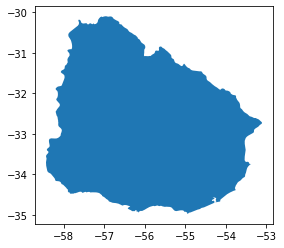

In [16]:

# # file_shape = "/content/Uruguay.shp"
path = r'./data/*.shp'
files = glob.glob(path)
file_shape=files[0]
print('\n\nFile:', file_shape,'\n\n')


crs={'init':'epsg:4326'}
geodf_shape = gpd.read_file(file_shape, crs=crs)
geodf_shape.plot()


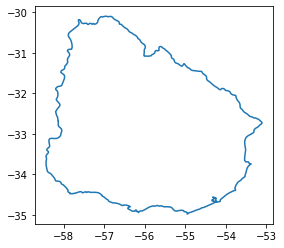

In [17]:
# plot boundaries
geodf_shape.boundary.plot()

## Plot

In [18]:
df_sat_lat_lon = get_lat_lon(df_satellite, 'latitude', 'longitude')
df_sat_lat_lon[:5]

,lat,lon
0,-34.974998,-58.975006
1,-34.974998,-58.925003
2,-34.974998,-58.875008
3,-34.974998,-58.825005
4,-34.974998,-58.775002


In [19]:
df_sat_lat_lon.describe()

,lat,lon
count,12000.000000,12000.000000
mean,-32.500000,-56.000005
std,1.443364,1.732063
min,-34.974998,-58.975006
25%,-33.737499,-57.487505
50%,-32.500000,-56.000004
75%,-31.262500,-54.512503
max,-30.025000,-53.025002


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


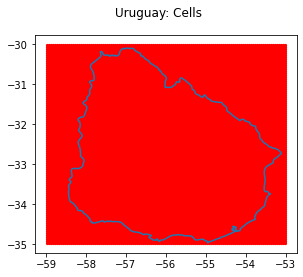

In [20]:
# coordinate reference system
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_sat_lat_lon['lon'], df_sat_lat_lon['lat'])]

fig, ax = plt.subplots()

df_geo_cells = gpd.GeoDataFrame(df_sat_lat_lon,crs=crs, geometry=geometry)
df_geo_cells.plot(ax=ax, color='red', markersize=5)

geodf_shape.boundary.plot(ax=ax)

fig.suptitle('Uruguay: Cells ', fontsize=12)
fig.show()

- **Spatial Resolution**: 1°x1°        (157.40 km diagonal distance [111.30kmx111.30km] )
- **Spatial Resolution**: 0.25°x0.25°  (39.35 km diagonal distance [27.83kmx27.83km] ) 
- **Spatial Resolution**: 0.1°x0.1°        (15.74 km diagonal distance [11.13kmx11.13km] )
- **Spatial Resolution**: **0.05°x0.05°**  (7.87 km diagonal distance  [5.57kmx5.57km] )

